# Computing percent changes for each drug per month

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time
import datetime

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
plt.style.use('fivethirtyeight')
from tqdm import tqdm

### Loading Data

In [2]:
# Loading the dataset
df = pd.read_csv('../Processed_Data/merge_with_iqvia_2014_01_2020_09_monthly_V3.csv')


df = df[['NDC', 'Product', 'Major Class', 'Acute/Chronic', 'Prod Form', 'Pack Size', 
         'Pack Quantity', 'WAC', 'Month', 'Year', 'TRx']]


df = df.dropna(subset=['WAC'])


df['Date'] = df.Year.astype(str) + '_' + df.Month.astype(str).apply(lambda x: '0' + x if int(x)<10 else x)
df.tail()

,NDC,Product,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,WAC,Month,Year,TRx,Date
272852,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,239.0,3,2020,46.0,2020_03
272853,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,239.0,4,2020,38.0,2020_04
272854,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,239.0,5,2020,30.0,2020_05
272855,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,239.0,6,2020,51.0,2020_06
272856,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,239.0,7,2020,44.0,2020_07


### 0. Creating percent changes per Year for each drug

In [ ]:
#Example of sort needed to calculate year of year percent change
df_yy_test = df[df.NDC == 2143301].sort_values(['Month', 'Year']).reset_index(drop=True)
df_yy_test.head()

# Test to calculate year of year percent change

In [5]:
# Sorting values
df_yy = df.sort_values(['NDC', 'Month', 'Year'])

# List of unique NDCs. Just 2 for to make sure it works
NDCs = [2143301,89122049663]

# Empty Dataframe to store new concat. data
df_pct_yy_test = pd.DataFrame(columns=df.columns)
df_pct_yy_test['Pct_change_y/y'] = None 

# Empty Dataframe to store new data for NDC level calculations
df_pct_yy_m_test = pd.DataFrame(columns=df_yy.columns)
df_pct_yy_m_test['Pct_change_y/y'] = None 

# For each drug, compute pct change and append to dataframe
for NDC in tqdm(NDCs):
    df_temp1 = df_yy[df_yy.NDC == NDC].copy()
    
    for num in range(1, 13):
        df_temp2 = df_temp1[df_temp1.Month == num].copy()
        df_temp2['Pct_change_y/y'] = df_temp2.WAC.pct_change()
        df_pct_yy_m_test = pd.concat((df_pct_yy_m_test, df_temp2))

       
    df_pct_yy_test = pd.concat((df_pct_yy_test, df_pct_yy_m_test))
    df_pct_yy_m_test = pd.DataFrame(columns=df_yy.columns)
    df_pct_yy_m_test['Pct_change_y/y'] = None 

print("Shape: ", df_pct_yy_test.shape)
df_pct_yy_test

100%|██████████| 2/2 [00:00<00:00, 18.26it/s]

Shape:  (92, 13)


,NDC,Product,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,WAC,Month,Year,TRx,Date,Pct_change_y/y
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16000,1,2015,21.0,2015_01,NaN
15,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,287.40000,1,2016,110.0,2016_01,0.177097
27,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,313.00000,1,2017,132.0,2017_01,0.089074
50,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,338.00000,1,2018,259.0,2018_01,0.079872
51,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,365.10000,1,2019,459.0,2019_01,0.080178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272847,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,239.00000,10,2019,56.0,2019_10,0.644495
272836,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,145.33333,11,2018,64.0,2018_11,NaN
272848,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,239.00000,11,2019,45.0,2019_11,0.644495
272837,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,145.33333,12,2018,55.0,2018_12,NaN


# Year of Year Percent Change with all NDCs

In [8]:
# Sorting values
df_yy = df.sort_values(['NDC', 'Month', 'Year'])

# List of unique NDCs 
NDCs = df.NDC.unique()

# Empty Dataframe to store new concat. data
df_pct_yy = pd.DataFrame(columns=df.columns)
df_pct_yy['Pct_change_y/y'] = None 

# Empty Dataframe to store new data for NDC level calculations
df_pct_yy_m = pd.DataFrame(columns=df_yy.columns)
df_pct_yy_m['Pct_change_y/y'] = None 

# For each drug, compute pct change and append to dataframe
for NDC in tqdm(NDCs):
    df_temp1 = df_yy[df_yy.NDC == NDC].copy()
    
    for num in range(1, 13):
        df_temp2 = df_temp1[df_temp1.Month == num].copy()
        df_temp2['Pct_change_y/y'] = df_temp2.WAC.pct_change()
        df_pct_yy_m = pd.concat((df_pct_yy_m, df_temp2))
       
    df_pct_yy = pd.concat((df_pct_yy, df_pct_yy_m))
    df_pct_yy_m = pd.DataFrame(columns=df_yy.columns)
    df_pct_yy_m['Pct_change_y/y'] = None 

print("Shape: ", df_pct_yy.shape)
df_pct_yy.head()

100%|██████████| 4633/4633 [08:56<00:00,  8.64it/s]

Shape:  (272280, 13)


,NDC,Product,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,WAC,Month,Year,TRx,Date,Pct_change_y/y
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,1,2015,21.0,2015_01,NaN
15,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,287.40,1,2016,110.0,2016_01,0.177097
27,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,313.00,1,2017,132.0,2017_01,0.089074
50,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,338.00,1,2018,259.0,2018_01,0.079872
51,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,365.10,1,2019,459.0,2019_01,0.080178


In [15]:
#Calculating revenue
df_pct_yy['Revenue'] = df_pct_yy['WAC'] * df_pct_yy['TRx']
df_pct_yy

,NDC,Product,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,WAC,Month,Year,TRx,Date,Pct_change_y/y,Revenue
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16000,1,2015,21.0,2015_01,NaN,5127.36000
15,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,287.40000,1,2016,110.0,2016_01,0.177097,31614.00000
27,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,313.00000,1,2017,132.0,2017_01,0.089074,41316.00000
50,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,338.00000,1,2018,259.0,2018_01,0.079872,87542.00000
51,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,365.10000,1,2019,459.0,2019_01,0.080178,167580.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272847,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,239.00000,10,2019,56.0,2019_10,0.644495,13384.00000
272836,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,145.33333,11,2018,64.0,2018_11,NaN,9301.33312
272848,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,239.00000,11,2019,45.0,2019_11,0.644495,10755.00000
272837,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,145.33333,12,2018,55.0,2018_12,NaN,7993.33315


In [22]:
#Calculating total revenue for all drugs for each month
df_pct_yy['Total_revenue'] = df_pct_yy.groupby('Date')['Revenue'].transform('sum')
df_pct_yy

,NDC,Product,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,WAC,Month,Year,TRx,Date,Pct_change_y/y,Revenue,Total_revenue
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16000,1,2015,21.0,2015_01,NaN,5127.36000,1.958633e+09
15,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,287.40000,1,2016,110.0,2016_01,0.177097,31614.00000,2.375391e+09
27,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,313.00000,1,2017,132.0,2017_01,0.089074,41316.00000,2.914099e+09
50,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,338.00000,1,2018,259.0,2018_01,0.079872,87542.00000,3.562449e+09
51,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,365.10000,1,2019,459.0,2019_01,0.080178,167580.90000,4.371885e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272847,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,239.00000,10,2019,56.0,2019_10,0.644495,13384.00000,6.330097e+09
272836,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,145.33333,11,2018,64.0,2018_11,NaN,9301.33312,4.290780e+09
272848,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,239.00000,11,2019,45.0,2019_11,0.644495,10755.00000,4.884487e+09
272837,89122049663,HYMOVIS 03/2016 FDA,PAIN,CHRONIC,INJECTABLES,2,3.0,145.33333,12,2018,55.0,2018_12,NaN,7993.33315,4.088038e+09


In [23]:
#Calculating Weighted Percent Change
df_pct_yy['Wght_pct_change_y/y'] = df_pct_yy['Pct_change_y/y'] * (df_pct_yy['Revenue'] / df_pct_yy['Total_revenue'])
df_pct_yy.head()


,NDC,Product,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,WAC,Month,Year,TRx,Date,Pct_change_y/y,Revenue,Total_revenue,Wght_pct_change_y/y
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,1,2015,21.0,2015_01,NaN,5127.36,1.958633e+09,NaN
15,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,287.40,1,2016,110.0,2016_01,0.177097,31614.00,2.375391e+09,0.000002
27,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,313.00,1,2017,132.0,2017_01,0.089074,41316.00,2.914099e+09,0.000001
50,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,338.00,1,2018,259.0,2018_01,0.079872,87542.00,3.562449e+09,0.000002
51,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,365.10,1,2019,459.0,2019_01,0.080178,167580.90,4.371885e+09,0.000003


In [24]:
#Revenue Weighted, Year-over-year WAC percent change for entire market
df_yearoveryear_market = df_pct_yy.groupby('Date')['Wght_pct_change_y/y'].sum().reset_index()

In [25]:
df_yearoveryear_market.head()

,Date,Wght_pct_change_y/y
0,2014_08,0.000008
1,2014_09,0.000002
2,2014_10,0.000057
3,2014_11,0.000000
4,2014_12,0.000868


<AxesSubplot:xlabel='Date'>

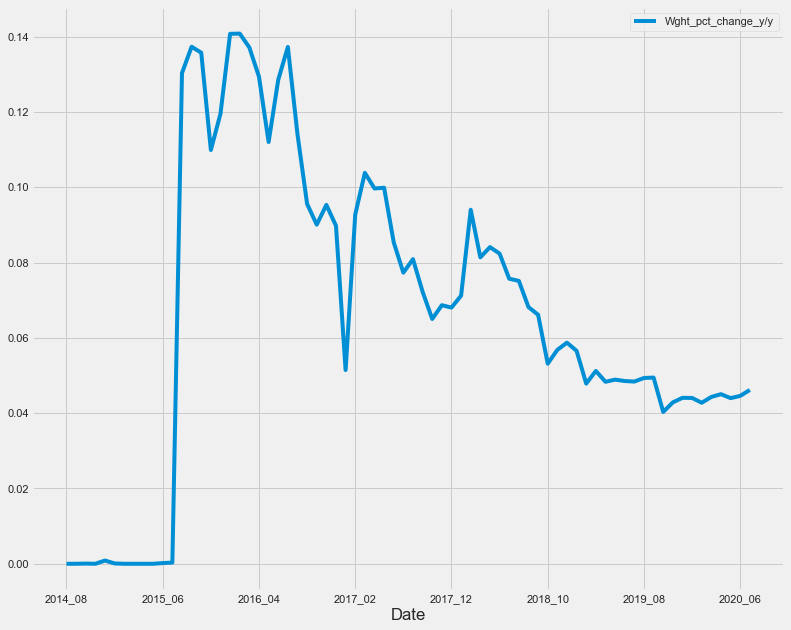

In [26]:
#Graphing weighted average WAC percent change
df_yearoveryear_market.plot(x='Date', y='Wght_pct_change_y/y')

In [ ]:
# Saving dataset
df_pct_yy.to_csv('yearoveryear_WAC_pct_changes_RevWeighted_monthly.csv', index=False)